In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sympy

# Generate data

In [6]:
listOfDicts = []

for i in sympy.primerange(10000, 100000):
    
    listOfDicts.append(
        dict(
            [(j, int(str(i)[j])) for j in range(5)]
            )
    )

df = pd.DataFrame(listOfDicts)
df.columns = ["1st", "2nd", "3rd", "4th", "5th"]

df.head()

,1st,2nd,3rd,4th,5th
0,1,0,0,0,7
1,1,0,0,0,9
2,1,0,0,3,7
3,1,0,0,3,9
4,1,0,0,6,1


# Digit distribution is affected by the other digits
Example below: The distribution of possible digits for the 3rd digit is affected by what the 2nd digit is.

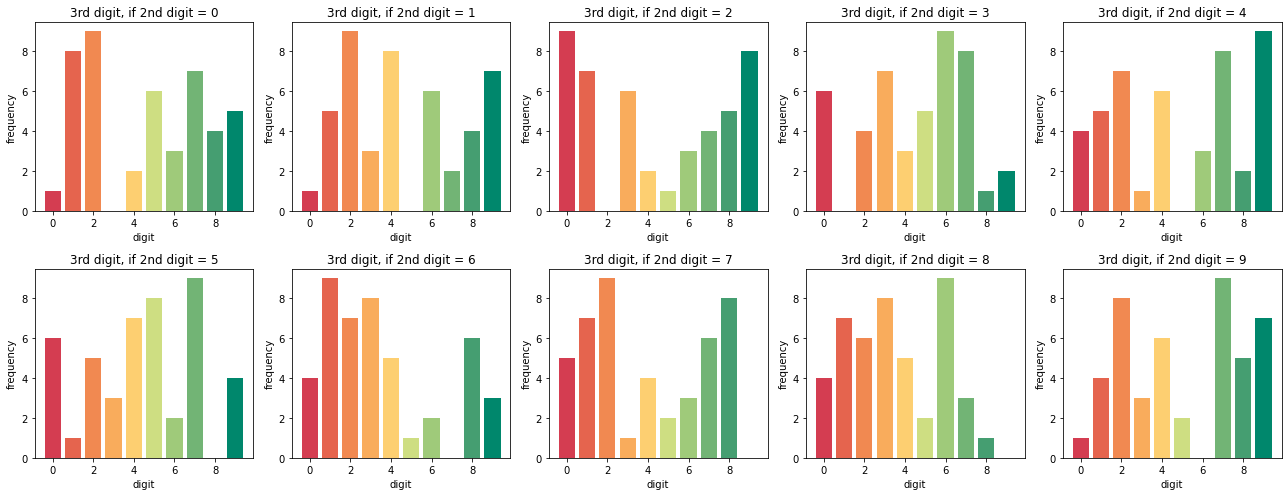

In [7]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (18, 7))
names = [i for i in range(10)]

for i, ax in enumerate(axes.flat):
    ax.set_xlabel('digit')
    ax.set_ylabel('frequency')

    ax.title.set_text("3rd digit, if 2nd digit = " + str(i))

    ax.bar(
        names,
        dict(df[df["2nd"] == i]["3rd"].value_counts()),
        color = ['#d43d51', '#e5644e', '#f18951', '#f9ac5c', '#fdcf71', '#cede82', '#9fca7a', '#72b475', '#459e71', '#00876c']
    )

fig.tight_layout()

plt.show()

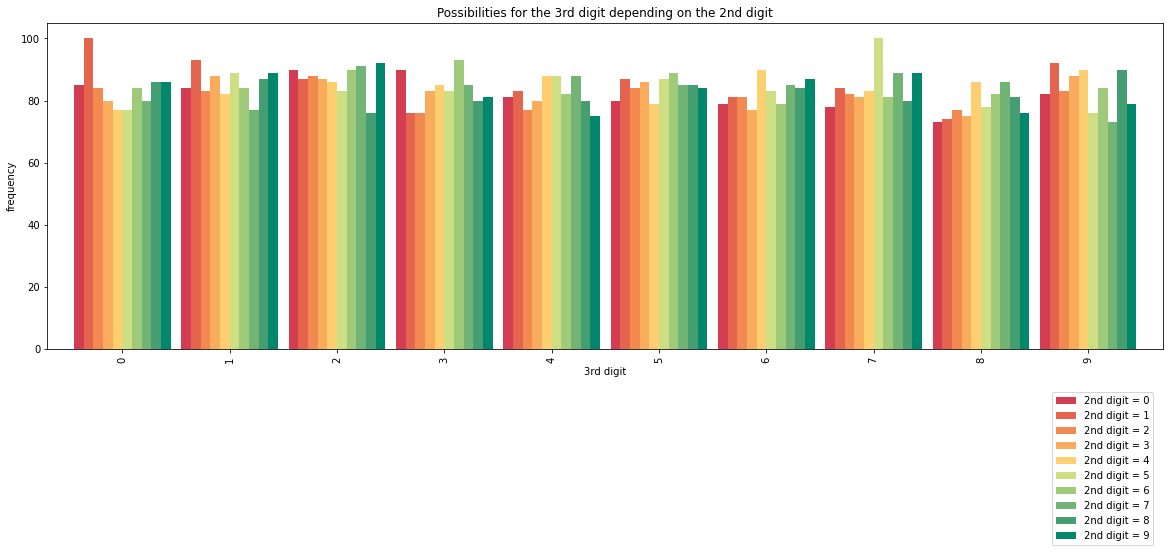

In [46]:
newList = []

for i in range(10):
    newList.append(
        dict(
            df[df["2nd"] == i]["3rd"].value_counts().sort_index()
        )
    )

df2 = pd.DataFrame(newList)
df2.columns = [f"2nd digit = {i}" for i in range(10)]

df2.plot(

    kind = 'bar',
    figsize = (20, 6),
    xlabel = "3rd digit", 
    ylabel = "frequency",
    title = "Possibilities for the 3rd digit depending on the 2nd digit",
    width = 0.9,
    color = ['#d43d51', '#e5644e', '#f18951', '#f9ac5c', '#fdcf71', '#cede82', '#9fca7a', '#72b475', '#459e71', '#00876c']


).legend(loc=(0.9,-0.6))

plt.show()